In [1]:
#Import all required packages
import requests
import pandas as pd
import io

In [2]:
#Load the Data set Through URL
urlData = requests.get("https://api.data.gov.in/resource/3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69?api-key=579b464db66ec23bdd0000015afe42009a124ab6502fddaecc169660&format=csv&offset=0&limit=200").content
#Converting the data to pandas dataframe.
df = pd.read_csv(io.StringIO(urlData.decode('utf-8')))

In [3]:
#Shape the data set
df.shape

(200, 11)

#Cleaning and Exploring the Data Set

In [4]:
df.head()

,id,country,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,pollutant_unit
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,PM2.5,9.0,32.0,19.0,NaN
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,PM10,14.0,36.0,22.0,NaN
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,NO2,21.0,40.0,30.0,NaN
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,NH3,2.0,4.0,3.0,NaN
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,SO2,1.0,59.0,29.0,NaN


In [5]:
df.shape

(200, 11)

In [6]:
df.dtypes

id                  int64
country            object
state              object
city               object
station            object
last_update        object
pollutant_id       object
pollutant_min     float64
pollutant_max     float64
pollutant_avg     float64
pollutant_unit    float64
dtype: object

In [7]:
df.columns

Index(['id', 'country', 'state', 'city', 'station', 'last_update',
       'pollutant_id', 'pollutant_min', 'pollutant_max', 'pollutant_avg',
       'pollutant_unit'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              200 non-null    int64  
 1   country         200 non-null    object 
 2   state           200 non-null    object 
 3   city            200 non-null    object 
 4   station         200 non-null    object 
 5   last_update     200 non-null    object 
 6   pollutant_id    200 non-null    object 
 7   pollutant_min   193 non-null    float64
 8   pollutant_max   193 non-null    float64
 9   pollutant_avg   193 non-null    float64
 10  pollutant_unit  0 non-null      float64
dtypes: float64(4), int64(1), object(6)
memory usage: 17.3+ KB


In [9]:
df.columns

Index(['id', 'country', 'state', 'city', 'station', 'last_update',
       'pollutant_id', 'pollutant_min', 'pollutant_max', 'pollutant_avg',
       'pollutant_unit'],
      dtype='object')

In [10]:
df.drop(['id'],axis=1,inplace=True)

In [11]:
df.head()

,country,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,pollutant_unit
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,PM2.5,9.0,32.0,19.0,NaN
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,PM10,14.0,36.0,22.0,NaN
2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,NO2,21.0,40.0,30.0,NaN
3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,NH3,2.0,4.0,3.0,NaN
4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,SO2,1.0,59.0,29.0,NaN


In [12]:
df['pollutant_unit'] = df['pollutant_unit'].fillna(0)

In [13]:
df.head()

,country,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,pollutant_unit
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,PM2.5,9.0,32.0,19.0,0.0
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,PM10,14.0,36.0,22.0,0.0
2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,NO2,21.0,40.0,30.0,0.0
3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,NH3,2.0,4.0,3.0,0.0
4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,SO2,1.0,59.0,29.0,0.0


In [14]:
df = df.drop(df.columns[-1],axis=1)

In [15]:
df.head()

,country,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,PM2.5,9.0,32.0,19.0
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,PM10,14.0,36.0,22.0
2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,NO2,21.0,40.0,30.0
3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,NH3,2.0,4.0,3.0
4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,SO2,1.0,59.0,29.0


In [16]:
df.isnull().sum().sum()

21

In [17]:
df.dropna(inplace=True)

In [18]:
df.isnull().sum().sum()

0

In [19]:
df.head()

,country,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,PM2.5,9.0,32.0,19.0
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,PM10,14.0,36.0,22.0
2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,NO2,21.0,40.0,30.0
3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,NH3,2.0,4.0,3.0
4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,SO2,1.0,59.0,29.0


In [20]:
df.columns

Index(['country', 'state', 'city', 'station', 'last_update', 'pollutant_id',
       'pollutant_min', 'pollutant_max', 'pollutant_avg'],
      dtype='object')

In [21]:
df['last_update'].describe()

count                     193
unique                      1
top       14-10-2020 08:00:00
freq                      193
Name: last_update, dtype: object

In [22]:
df['pollutant_id'].value_counts()

CO       31
OZONE    30
PM2.5    29
NO2      27
PM10     27
SO2      26
NH3      23
Name: pollutant_id, dtype: int64

#Visulization the Data set

In [23]:
#Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Count Plot

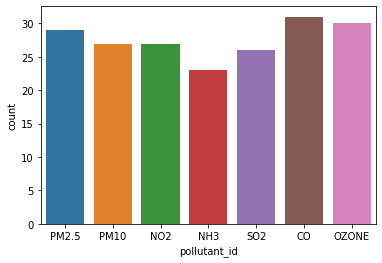

In [24]:
sns.countplot(x='pollutant_id',data=df)

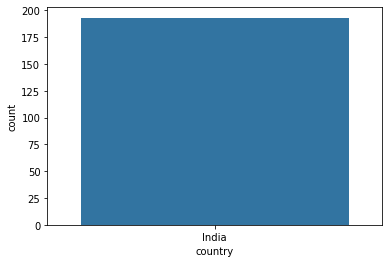

In [25]:
sns.countplot(x='country',data=df)

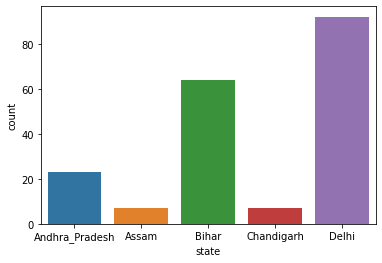

In [26]:
sns.countplot(x='state',data=df)

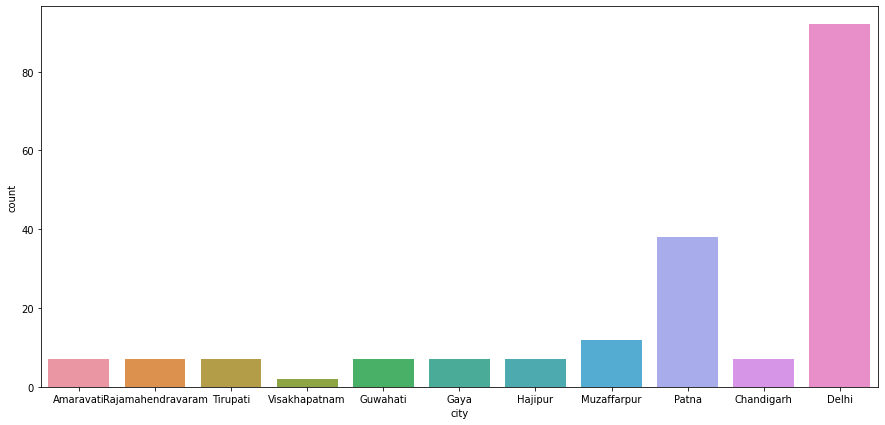

In [27]:
plt.figure(figsize=(15,7))
sns.countplot(x='city',data=df)

In [28]:
station = list(set(df['station'].values.tolist()))
station.sort()
print(station)

['Alipur, Delhi - DPCC', 'Anand Kala Kshetram, Rajamahendravaram - APPCB', 'Anand Vihar, Delhi - DPCC', 'Ashok Vihar, Delhi - DPCC', 'Aya Nagar, Delhi - IMD', 'Bawana, Delhi - DPCC', 'Buddha Colony, Muzaffarpur - BSPCB', 'CRRI Mathura Road, Delhi - IMD', 'DRM Office Danapur, Patna - BSPCB', 'DTU, Delhi - CPCB', 'Dr. Karni Singh Shooting Range, Delhi - DPCC', 'Dwarka-Sector 8, Delhi - DPCC ', 'GVM Corporation, Visakhapatnam - APPCB', 'Govt. High School Shikarpur, Patna - BSPCB', 'IGI Airport (T3), Delhi - IMD', 'IGSC Planetarium Complex, Patna - BSPCB', 'IHBAS, Dilshad Garden, Delhi - CPCB', 'ITO, Delhi - CPCB', 'Industrial Area, Hajipur - BSPCB', 'Jahangirpuri, Delhi - DPCC', 'Jawaharlal Nehru Stadium, Delhi - DPCC', 'Lodhi Road, Delhi - IMD', 'Muradpur, Patna - BSPCB', 'Muzaffarpur Collectorate, Muzaffarpur - BSPCB', 'Railway Colony, Guwahati - APCB', 'Rajbansi Nagar, Patna - BSPCB', 'SFTI Kusdihra, Gaya - BSPCB', 'Samanpura, Patna - BSPCB', 'Secretariat, Amaravati - APPCB', 'Sector-2

In [29]:
string = 'station'
print(len(string))

7


#groupby

In [30]:
country = df.groupby('country').max()[['state']]
country

,state
country,
India,Delhi


In [31]:
state = df.groupby('state').max()[['city']]
state

,city
state,
Andhra_Pradesh,Visakhapatnam
Assam,Guwahati
Bihar,Patna
Chandigarh,Chandigarh
Delhi,Delhi


In [32]:
state = df.groupby('state').max()[['station']]
state

,station
state,
Andhra_Pradesh,"Tirumala, Tirupati - APPCB"
Assam,"Railway Colony, Guwahati - APCB"
Bihar,"Samanpura, Patna - BSPCB"
Chandigarh,"Sector-25, Chandigarh - CPCC"
Delhi,"Lodhi Road, Delhi - IMD"


In [33]:
state = df.groupby('state').max()[['pollutant_id']]
state

,pollutant_id
state,
Andhra_Pradesh,SO2
Assam,SO2
Bihar,SO2
Chandigarh,SO2
Delhi,SO2


In [34]:
city = df.groupby('city').max()[['pollutant_id']]
city

,pollutant_id
city,
Amaravati,SO2
Chandigarh,SO2
Delhi,SO2
Gaya,SO2
Guwahati,SO2
Hajipur,SO2
Muzaffarpur,SO2
Patna,SO2
Rajamahendravaram,SO2


In [35]:
station = df.groupby('station').max()[['pollutant_id']]
station

,pollutant_id
station,
"Alipur, Delhi - DPCC",SO2
"Anand Kala Kshetram, Rajamahendravaram - APPCB",SO2
"Anand Vihar, Delhi - DPCC",SO2
"Ashok Vihar, Delhi - DPCC",SO2
"Aya Nagar, Delhi - IMD",PM2.5
"Bawana, Delhi - DPCC",SO2
"Buddha Colony, Muzaffarpur - BSPCB",SO2
"CRRI Mathura Road, Delhi - IMD",PM2.5
"DRM Office Danapur, Patna - BSPCB",SO2


In [36]:
df.groupby('pollutant_id').max()[['state','last_update']].tail(20)

,state,last_update
pollutant_id,,
CO,Delhi,14-10-2020 08:00:00
NH3,Delhi,14-10-2020 08:00:00
NO2,Delhi,14-10-2020 08:00:00
OZONE,Delhi,14-10-2020 08:00:00
PM10,Delhi,14-10-2020 08:00:00
PM2.5,Delhi,14-10-2020 08:00:00
SO2,Delhi,14-10-2020 08:00:00


#Pair plot

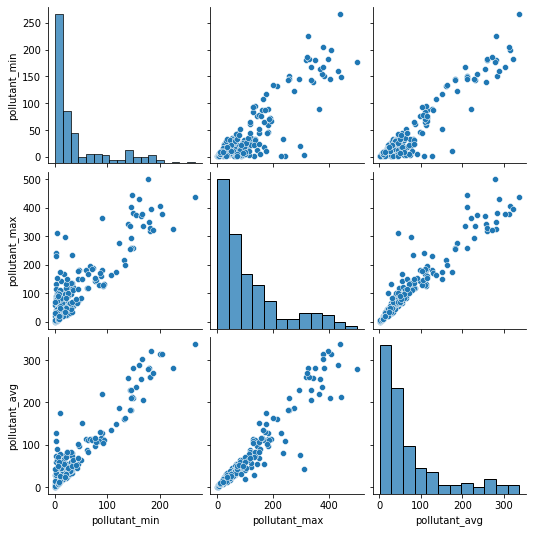

In [37]:
sns.pairplot(df, palette="Set2")

#Bar Plots

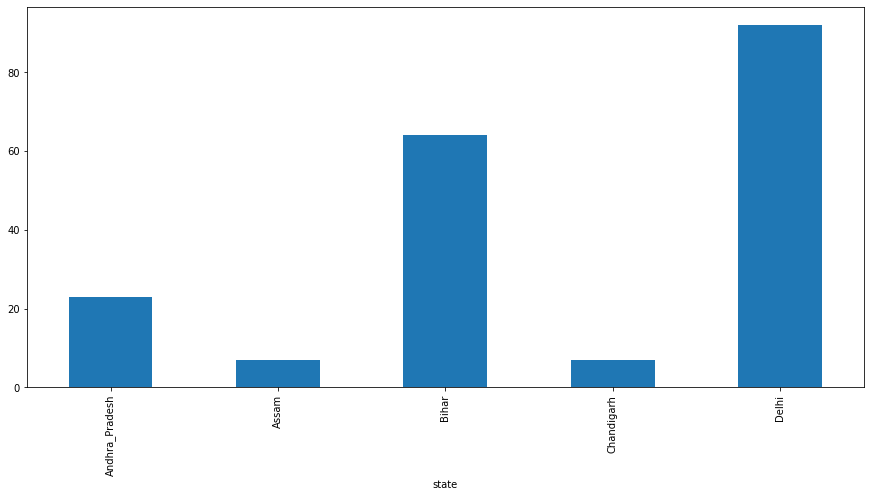

In [38]:
plt.figure(figsize=(15,7))
df.groupby(['state']).size().plot(kind = "bar")

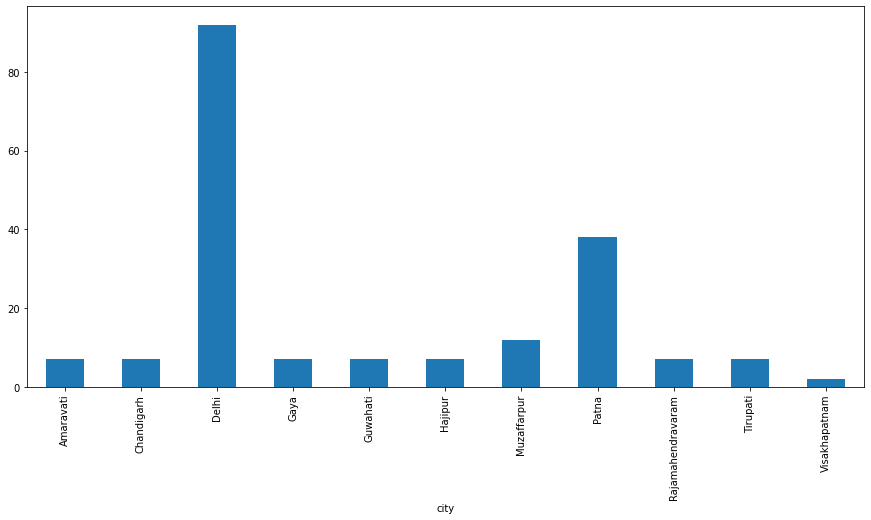

In [39]:
plt.figure(figsize=(15,7))
df.groupby(['city']).size().plot(kind = "bar")

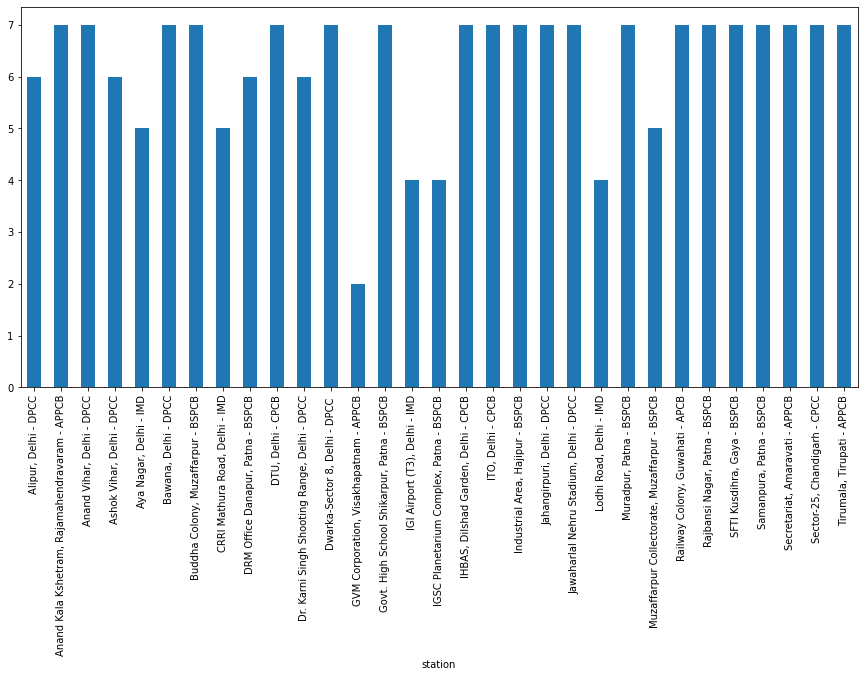

In [40]:
plt.figure(figsize=(15,7))
df.groupby(['station']).size().plot(kind = "bar")

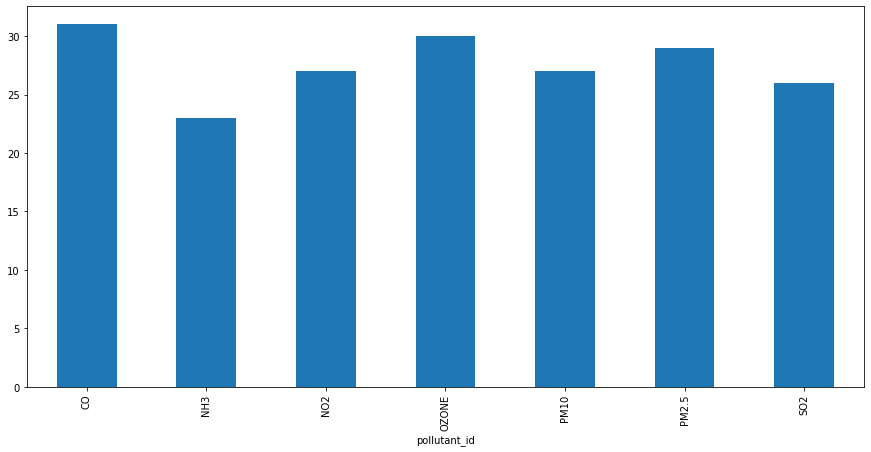

In [41]:
plt.figure(figsize=(15,7))
df.groupby(['pollutant_id']).size().plot(kind = "bar")

In [42]:
df.columns

Index(['country', 'state', 'city', 'station', 'last_update', 'pollutant_id',
       'pollutant_min', 'pollutant_max', 'pollutant_avg'],
      dtype='object')

#Box Plot

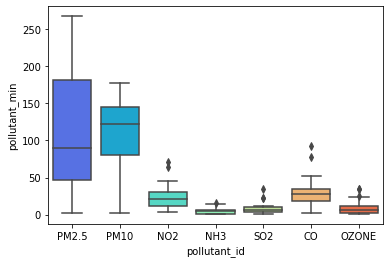

In [43]:
sns.boxplot(x='pollutant_id',y='pollutant_min',data=df,palette='rainbow')

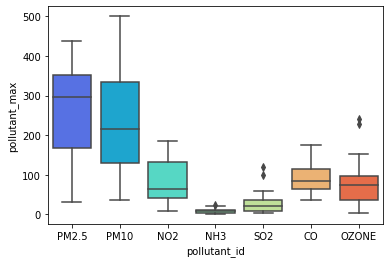

In [44]:
sns.boxplot(x='pollutant_id',y='pollutant_max',data=df,palette='rainbow')

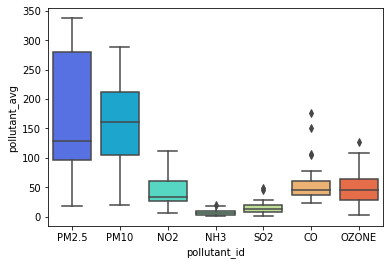

In [45]:
sns.boxplot(x='pollutant_id',y='pollutant_avg',data=df,palette='rainbow')

In [46]:
df.head()

,country,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
0,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,PM2.5,9.0,32.0,19.0
1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,PM10,14.0,36.0,22.0
2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,NO2,21.0,40.0,30.0
3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,NH3,2.0,4.0,3.0
4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",14-10-2020 08:00:00,SO2,1.0,59.0,29.0


In [47]:
df.tail()

,country,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
195,India,Delhi,Delhi,"Jawaharlal Nehru Stadium, Delhi - DPCC",14-10-2020 08:00:00,OZONE,7.0,92.0,50.0
196,India,Delhi,Delhi,"Lodhi Road, Delhi - IMD",14-10-2020 08:00:00,PM2.5,77.0,155.0,116.0
197,India,Delhi,Delhi,"Lodhi Road, Delhi - IMD",14-10-2020 08:00:00,PM10,134.0,199.0,163.0
198,India,Delhi,Delhi,"Lodhi Road, Delhi - IMD",14-10-2020 08:00:00,NO2,8.0,20.0,13.0
199,India,Delhi,Delhi,"Lodhi Road, Delhi - IMD",14-10-2020 08:00:00,CO,19.0,36.0,23.0


In [48]:
df.columns

Index(['country', 'state', 'city', 'station', 'last_update', 'pollutant_id',
       'pollutant_min', 'pollutant_max', 'pollutant_avg'],
      dtype='object')

In [49]:
df1 = df[['last_update','state','pollutant_id']]

In [50]:
df2 = pd.DataFrame(df1)
df2.head()

,last_update,state,pollutant_id
0,14-10-2020 08:00:00,Andhra_Pradesh,PM2.5
1,14-10-2020 08:00:00,Andhra_Pradesh,PM10
2,14-10-2020 08:00:00,Andhra_Pradesh,NO2
3,14-10-2020 08:00:00,Andhra_Pradesh,NH3
4,14-10-2020 08:00:00,Andhra_Pradesh,SO2


#Filter the Data set

#PM2.5

In [51]:
df3 = df2[df2['pollutant_id']=='PM2.5']

In [52]:
df3.head()

,last_update,state,pollutant_id
0,14-10-2020 08:00:00,Andhra_Pradesh,PM2.5
7,14-10-2020 08:00:00,Andhra_Pradesh,PM2.5
14,14-10-2020 08:00:00,Andhra_Pradesh,PM2.5
28,14-10-2020 08:00:00,Assam,PM2.5
35,14-10-2020 08:00:00,Bihar,PM2.5


#PM10

In [53]:
df4 = df2[df2['pollutant_id']=='PM10']

In [54]:
df4.head()

,last_update,state,pollutant_id
1,14-10-2020 08:00:00,Andhra_Pradesh,PM10
8,14-10-2020 08:00:00,Andhra_Pradesh,PM10
15,14-10-2020 08:00:00,Andhra_Pradesh,PM10
29,14-10-2020 08:00:00,Assam,PM10
36,14-10-2020 08:00:00,Bihar,PM10


#NO2

In [55]:
df5 = df2[df2['pollutant_id']=='NO2']

In [56]:
df5.head()

,last_update,state,pollutant_id
2,14-10-2020 08:00:00,Andhra_Pradesh,NO2
9,14-10-2020 08:00:00,Andhra_Pradesh,NO2
16,14-10-2020 08:00:00,Andhra_Pradesh,NO2
30,14-10-2020 08:00:00,Assam,NO2
37,14-10-2020 08:00:00,Bihar,NO2


#NH3

In [57]:
df6 = df2[df2['pollutant_id']=='NH3']

In [58]:
df6.head()

,last_update,state,pollutant_id
3,14-10-2020 08:00:00,Andhra_Pradesh,NH3
10,14-10-2020 08:00:00,Andhra_Pradesh,NH3
17,14-10-2020 08:00:00,Andhra_Pradesh,NH3
31,14-10-2020 08:00:00,Assam,NH3
38,14-10-2020 08:00:00,Bihar,NH3


#SO2

In [59]:
df7 = df2[df2['pollutant_id']=='SO2']

In [60]:
df7.head()

,last_update,state,pollutant_id
4,14-10-2020 08:00:00,Andhra_Pradesh,SO2
11,14-10-2020 08:00:00,Andhra_Pradesh,SO2
18,14-10-2020 08:00:00,Andhra_Pradesh,SO2
32,14-10-2020 08:00:00,Assam,SO2
39,14-10-2020 08:00:00,Bihar,SO2


#CO

In [61]:
df8 = df2[df2['pollutant_id']=='CO']

In [62]:
df8.head()

,last_update,state,pollutant_id
5,14-10-2020 08:00:00,Andhra_Pradesh,CO
12,14-10-2020 08:00:00,Andhra_Pradesh,CO
19,14-10-2020 08:00:00,Andhra_Pradesh,CO
26,14-10-2020 08:00:00,Andhra_Pradesh,CO
33,14-10-2020 08:00:00,Assam,CO


#OZONE

In [63]:
df9 = df2[df2['pollutant_id']=='OZONE']

In [64]:
df9.head()

,last_update,state,pollutant_id
6,14-10-2020 08:00:00,Andhra_Pradesh,OZONE
13,14-10-2020 08:00:00,Andhra_Pradesh,OZONE
20,14-10-2020 08:00:00,Andhra_Pradesh,OZONE
27,14-10-2020 08:00:00,Andhra_Pradesh,OZONE
34,14-10-2020 08:00:00,Assam,OZONE
